# Introduction
The simple pendulum has an apparent simple motion, and yet, the union of two pendulums generate a system with a chaotic motion. Although there is no formal proof, there is no known solution for the double pendulum system motion, and thus, it must be solved numerically. This study aims to analyze such a system and compare the sensitivity to different numerical methods. Moreover, it is also a goal to goal to analyze how the chaotic motion takes place, and whether it is prevalent for the entire system or for some cases. To achieve that, equations of motion are obtained using the Euler-Lagrangian equation. The resulting differential equations are them solved numerically, using Runge-Kutta (4th order) and Euler’s Explicit Forward methods. The system is then computationally simulated using the programming language python. Detailed solutions are initially presented for different initial states of the system and the two different numerical methods, analyzing motion, behavior, and mechanical energy of the system. Then, solutions are presented for a very large number of initial positions, allowing for patterns to be discovered.

This notebook, along with all its outputs and explanation can be found on the github repository https://github.com/notidentical/Double-Pendulum-Simulation/

# Library Imports

In [1]:
## Library Imports ##
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import animation

# Initial Configurations - User Defined

In [2]:
## Initial Configurations - User Defined ## 

# Run the N initial conditions simultaneously, where N = my_range. No-
# te that the simulation time increases exponentially with N. # Higher
# numbers are recommended to fully describe the chaotic behavior,a s 
# very small numbers of N can lead to incorret conclusions (less flips
# may be detected). Approximate simulation times on Author's computer:
# N = 50   → 2 minutes
# N = 100  → 5 minutes
# N = 200  → 20 minutes
# N = 500  → 2 hours
# N = 1000 → 6 hours
# N = 1500 → 16 hours
N = 1500

# Define the dpi of the plots. Note that this is configured to be proportional to N.
# It is recommended to use 100 dpi with N = 50,100 and 250 dpi with N=1000,1500 
dpi_figures = 100

# Numerical Methods

## Implementation

In [3]:
## Numerical Methods - Implementation ##

def RK4_method(f, y0, t, args=()):
    # Implementation of Runge-Kutta (4th order) numerical method
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    for i in range(n - 1):
        h = t[i+1] - t[i]
        k1 = f(y[i], t[i], *args)
        k2 = f(y[i] + k1 * h / 2., t[i] + h / 2., *args)
        k3 = f(y[i] + k2 * h / 2., t[i] + h / 2., *args)
        k4 = f(y[i] + k3 * h, t[i] + h, *args)
        y[i+1] = y[i] + (h / 6.) * (k1 + 2*k2 + 2*k3 + k4)
    return y

def Euler_method(f, y0, t, args=()):
    # Implementation of Runge-Kutta (4th order) numerical method
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    for i in range(n - 1):
        h = t[i+1] - t[i]
        y[i+1] = y[i] + f(y[i],t[i], *args)*h
    return y

## Tests

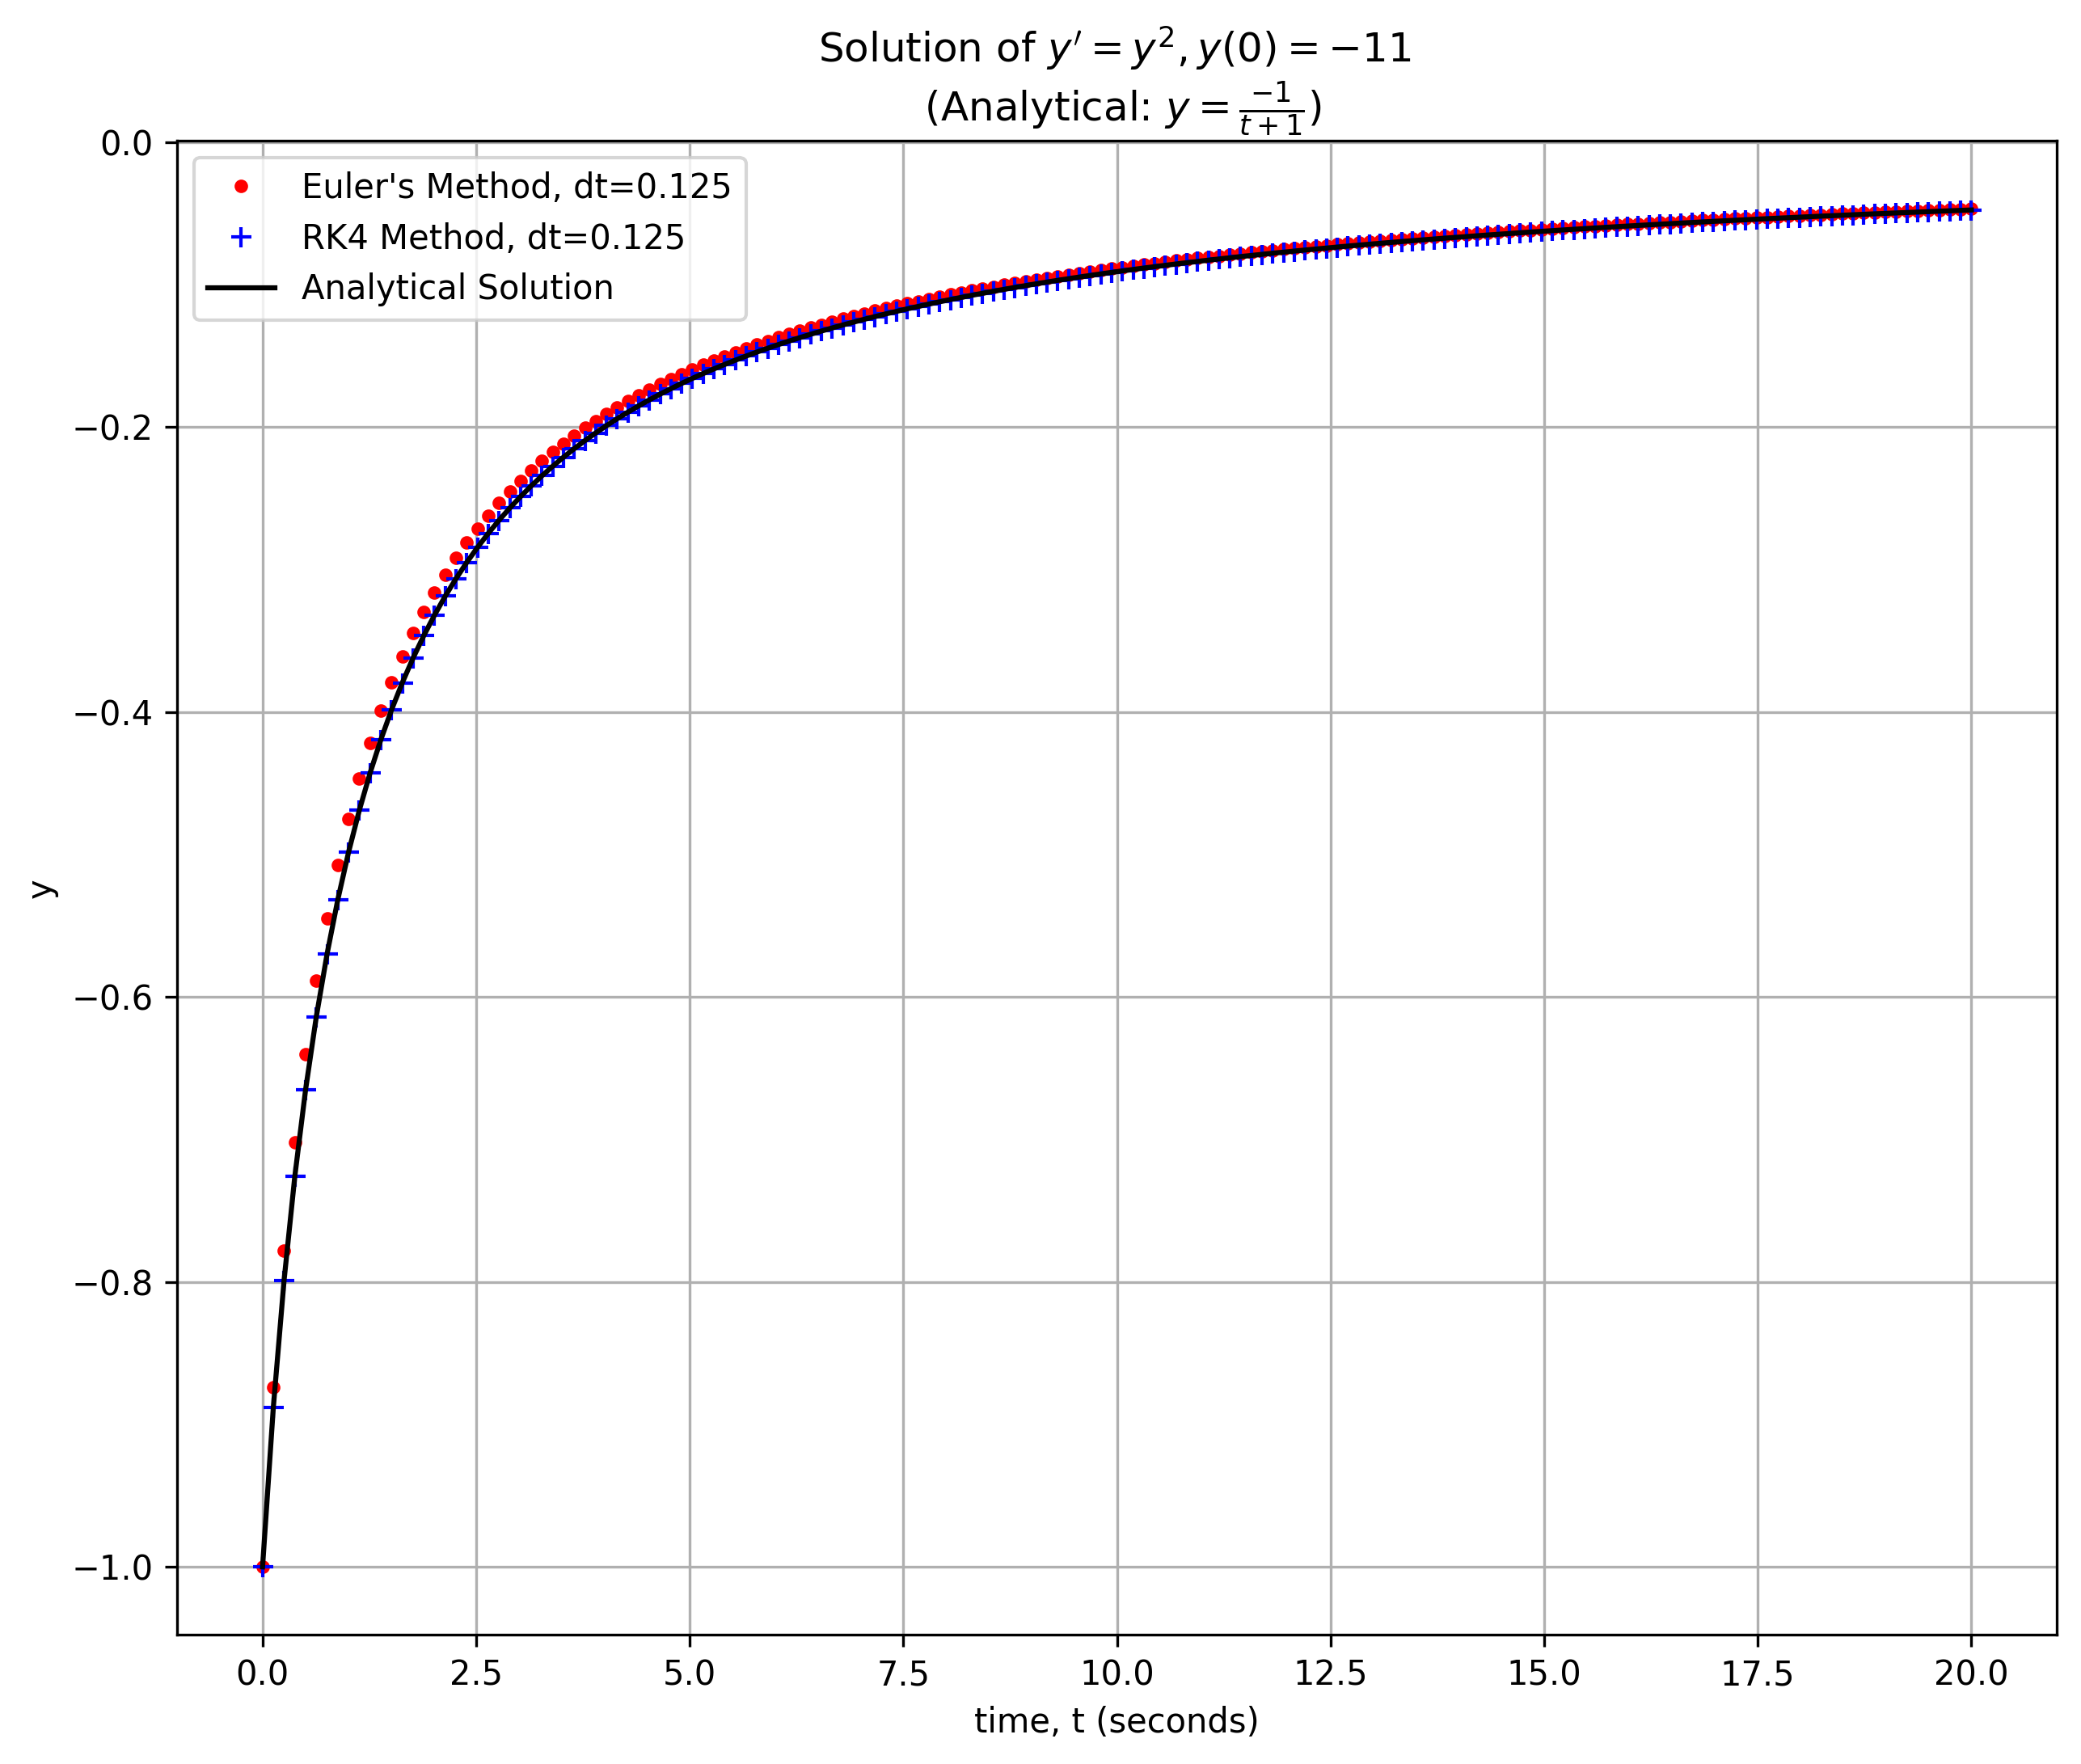

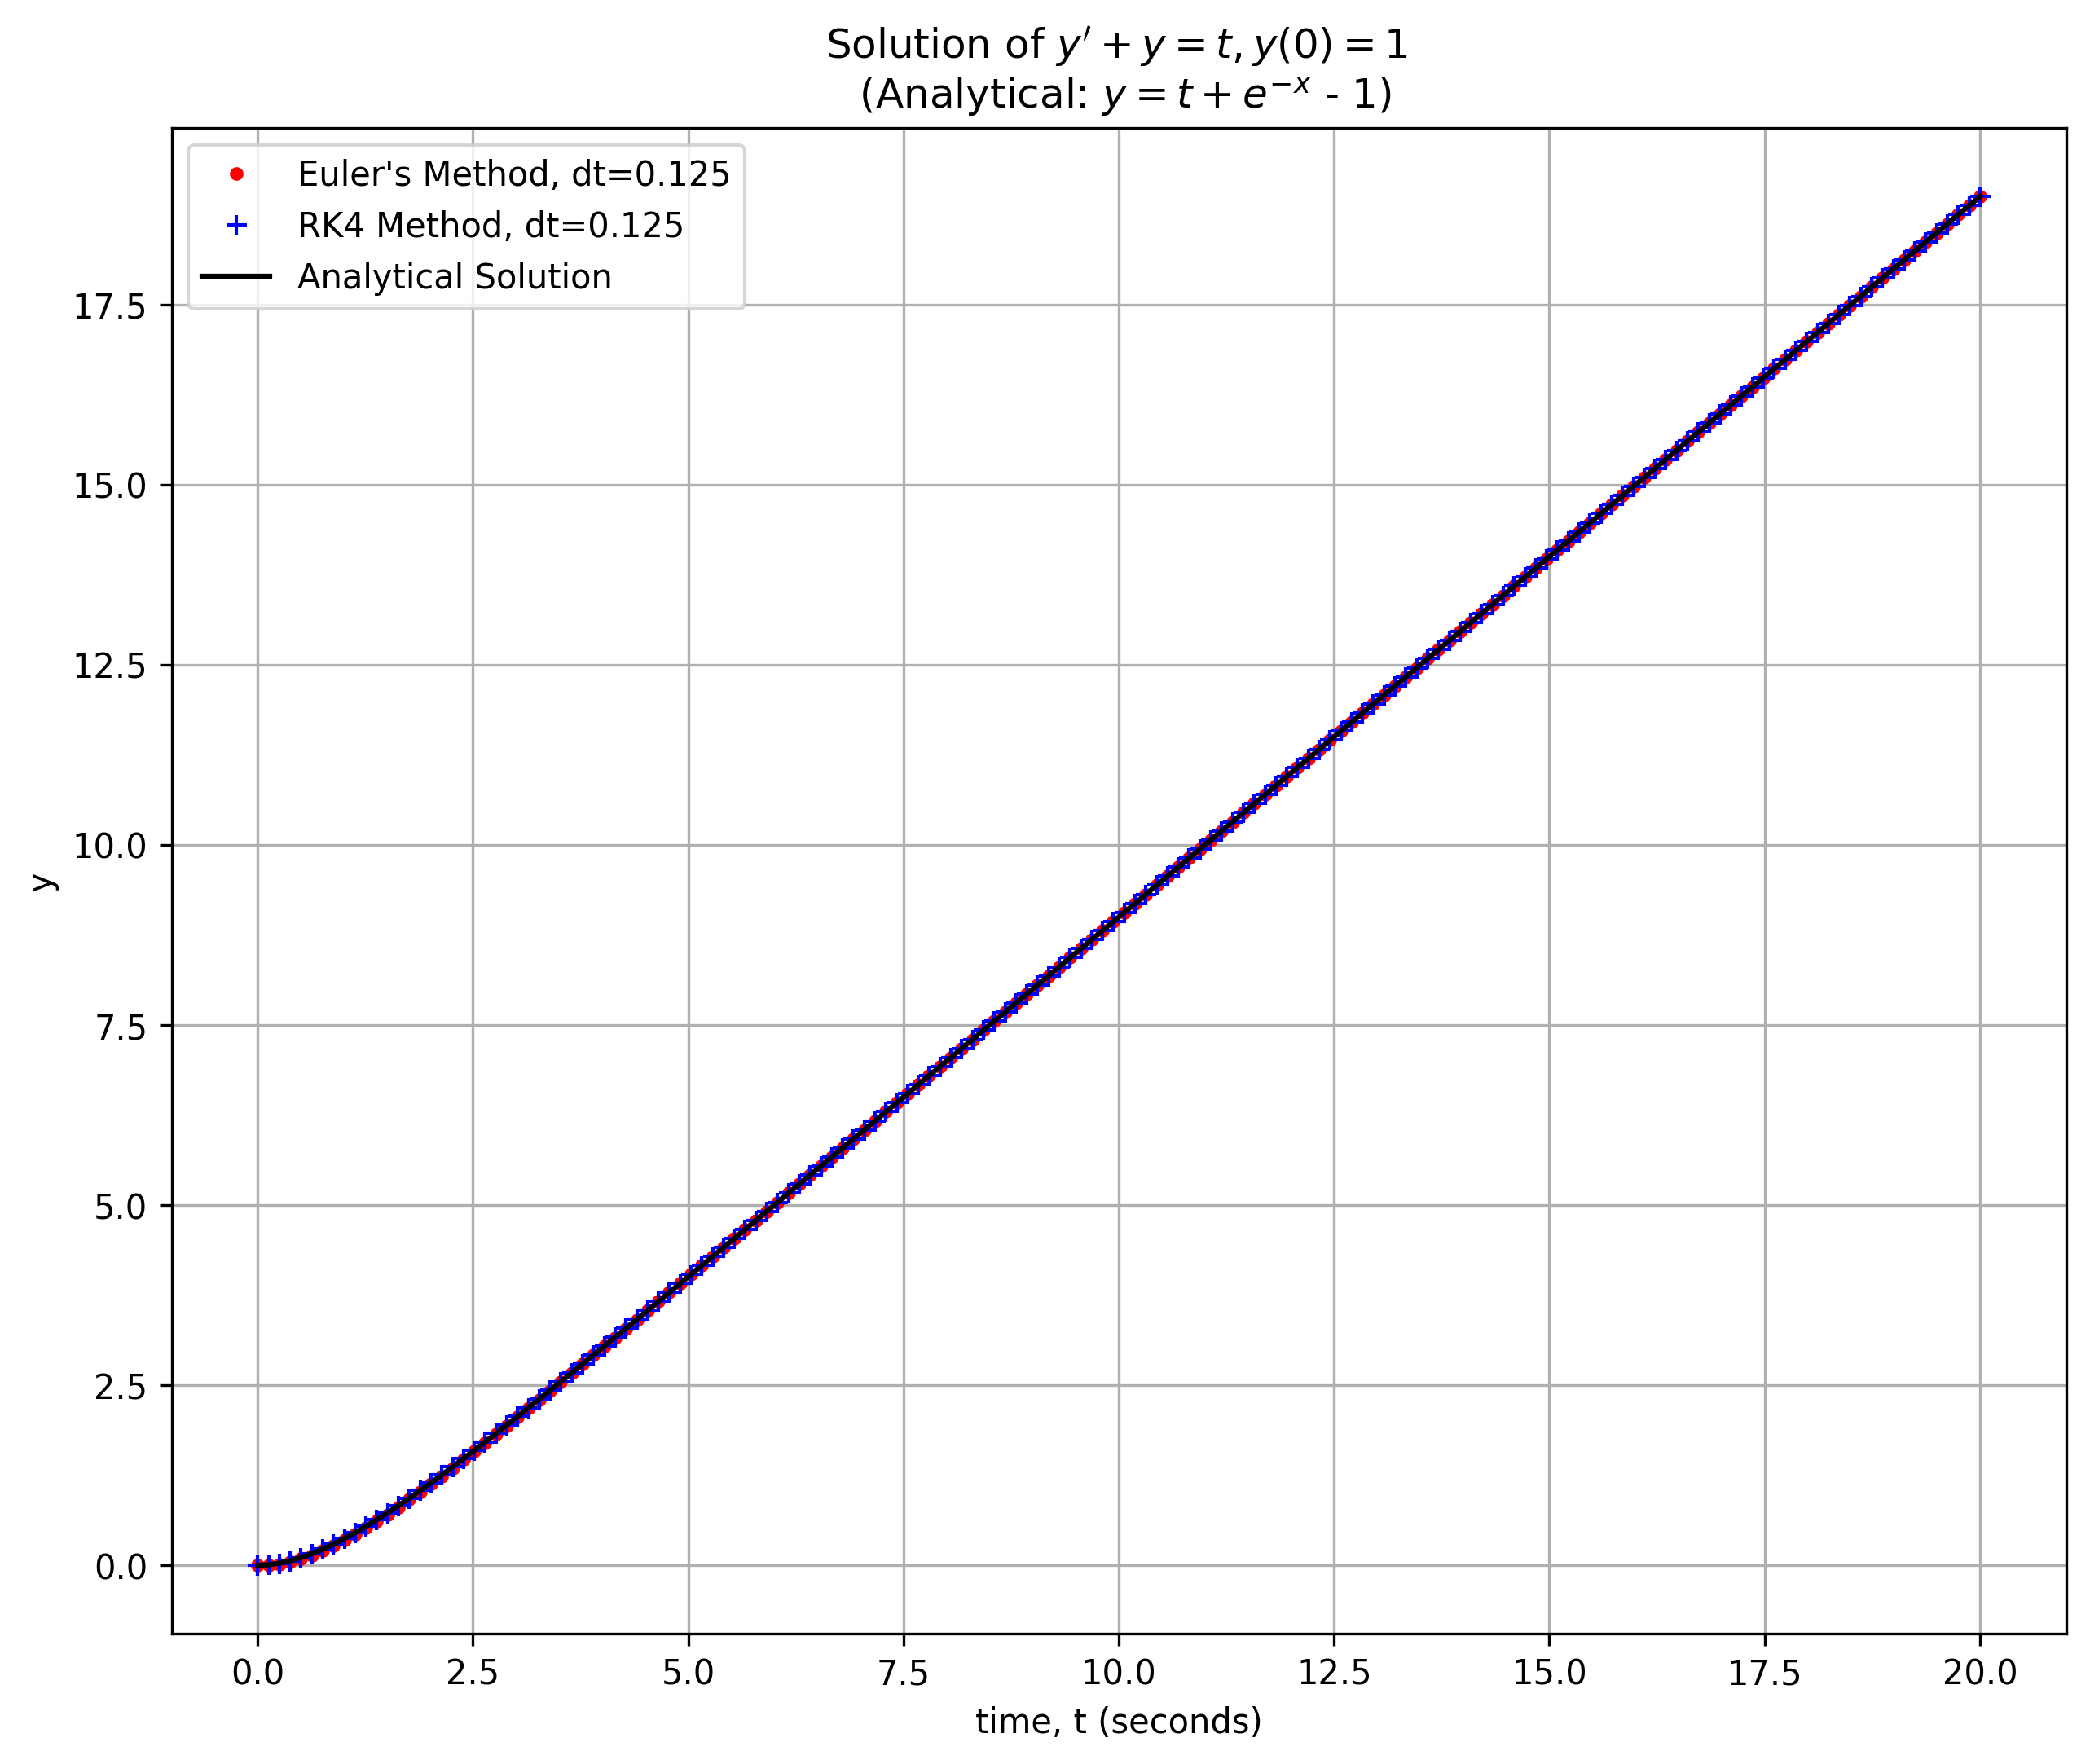

In [4]:
## Numerical Methods - Tests ##

def test(f_method1, f_method2, f_test, y0, t, f_test_latex, f_analytical):    
    # Function to compare two numerical methods (inputs 1 and 2) with an
    # ODE (input 3, 4) for a time (t). Also expects the function as a s-
    # tring (to display a title, input 5) and the analytical solution 
    # (input 6).

    y_RK    = f_method1(f_test, y0, t, args=())
    y_euler = f_method2(f_test, y0, t, args=())
    y_analytical = f_analytical

    plt.subplots(figsize=(10,8), dpi=300)
    plt.plot(t,y_euler,'r.',t,y_RK,'b+',t,y_analytical,'k')
    plt.grid(True)
    plt.legend(['Euler\'s Method, dt=' + str(max(t)/len(t)), 'RK4 Method, dt=' + str(max(t)/len(t)) ,'Analytical Solution'])
    plt.title("Solution of " + f_test_latex)
    plt.ylabel('y')
    plt.xlabel('time, t (seconds)')
    plt.savefig("Numerical Methods - Test" + str(y0)+".png",bbox_inches='tight', dpi=300)
    plt.show()

# Test 1
f = lambda y,t: y**2
t = np.linspace(0,20,160)
y0 = [-1]
f_analytical = - 1 / (t + 1)
f_test_latex="$y'=y^2 , y(0)=-11$ \n (Analytical: $ y=\\frac{-1}{t + 1} $)"
test(RK4_method, Euler_method, f, y0, t, f_test_latex, f_analytical)

# Test 2
def f(y, x):
    return x - y
y0 = [0]
f_analytical = t - 1 + np.exp(-t)
f_test_latex="$y'+y=t , y(0)=1$ \n (Analytical: $y = t + e^{-x}$ - 1)"
test(RK4_method, Euler_method, f, y0, t, f_test_latex, f_analytical)

# Double Pendulum Solution

In [5]:
## Double Pendulum - Solution ##

def double_pendulum(theta_1_0, theta_2_0, method, t_final):
  # Expects the initial angular position for both in radians (theta_1_0, theta_2_0)
  # Expects the numerical method to use (Options are RK4 and Euler)
  # Expects the total time to be simulated (t_final)
  
  # Simple Double Pendulum System - Configuration
  m1 = 1                      # mass 1 [kg]
  m2 = 0.5                    # mass 2 [kg]
  L1 = 1                      # wire length of mass 1 [m]
  L2 = 1.5                    # wire length of mass 2 [m] 
  g = 9.807                   # gravitational acceleration [m/s²]

  # Simple Double Pendulum System - Initial Values
  theta_1_0 = theta_1_0       # Angle of mass 1 with vertical axis [rad]
  omega_1_0 = 0               # Angular velocity of mass 1 with vertical axis [rad/s]
  theta_2_0 = theta_2_0       # Angle of mass 2 with vertical axis [rad]
  omega_2_0 = 0               # Angular velocity of mass 2 with vertical axis [rad/s]
  u0 = [theta_1_0, omega_1_0, theta_2_0, omega_2_0]

  # Simple Double Pendulum System - Time
  t_init  = 0                 # Initial time. Usually t=0 [seconds]
  t_final = t_final           # Final time [seconds]
  dt = 0.025                  # Desired time increment [seconds]
  n_steps = round(t_final/dt) # Number of steps. Note: round is required to make it an integer. 
  t = np.linspace(t_init, t_final, n_steps)
  
  def SDS(x,t,m1,m2,L1,L2,g):
      # SDS → Simple Double Pendulum Equations of Motion
      # dx = derivative of (x) with respect to time (t)
      dx = np.zeros(4) 
      c  = np.cos(x[0]-x[2]) 
      s  = np.sin(x[0]-x[2]) 
      dx[0] = x[1]   
      dx[2] = x[3]   
      dx[1] = (m2*g*np.sin(x[2])*c - m2*s*(L1*c*x[1]**2 + L2*x[3]**2) - (m1+m2)*g*np.sin(x[0]) ) /( L1 *(m1+m2*s**2) )
      dx[3] = ((m1+m2)*(L1*x[1]**2*s - g*np.sin(x[2]) + g*np.sin(x[0])*c) + m2*L2*x[3]**2*s*c) / (L2 * (m1 + m2*s**2))
      return dx

  if method == "RK4":
      S = RK4_method(SDS, u0, t, args=(m1,m2,L1,L2,g))
  elif method == "Euler":
      S = Euler_method(SDS, u0, t, args=(m1,m2,L1,L2,g))
  else:
      print("Error: Didn't select a numerical method.") 
  
  # Unpacking the Solution:
  theta1 = S[:,0]     # theta_1 (Position, mass 1)
  omega1 = S[:,1]     # omega 1 (Velocity, mass 1)
  theta2 = S[:,2]     # theta_2 (Position, mass 2)
  omega2 = S[:,3]     # omega_2 (Velocity, mass 1)


  # Converting polar coordinates to Cartesian
  # x_n, y_n → horizontal and vertical positions (mm)

  # Pendulum's mass #1
  x1 = L1*np.sin(theta1)
  y1 = -L1*np.cos(theta1)

  # Pendulum's mass #2
  x2 = x1 + L2*np.sin(theta2)     
  y2 = y1 - L2*np.cos(theta2)

  ### Counting flips for pendulum #1 and #2                     ###
  ## This define a "flip" as the moment the pendulum goes 360°. ##
  ## For pendulum mass #2                                       ##
  num_flips = 0
  cur_mod = 0
  prev_mod = 0
  marker_90d=0
  marker_180d=0
  marker_270d=0
  flips_2=[]
  for x in theta2:
      x = x*180/np.pi # Convert Rad → Degree
      cur_mod = np.floor(abs(x)/(360))
      cur_angle = np.mod(abs(x),(360))
      if ((cur_mod != prev_mod) and marker_90d and marker_180d and marker_270d):
          num_flips = num_flips + 1
          marker_90d = 0
          marker_180d = 0
          marker_270d = 0
      if ((np.floor(abs(cur_angle)/(90))) == 1):
        marker_90d = 1
      if ((np.floor(abs(cur_angle)/(180))) == 1):
        marker_180d = 1
      if ((np.floor(abs(cur_angle)/(270))) == 1):
        marker_270d = 1
      prev_mod = cur_mod
      flips_2.append(num_flips)
  
  flips_2_times=[]
  # Array with the seconds for the first, second, n flip (if it flips).
  # Empty if no flips
  for x in range(1, max(flips_2)+1):
      flips_2_times.append(flips_2.index(x)*dt)
      
  ## For pendulum mass #1                                       ##
  # Counting flips
  # This define a "flip" as the moment the pendulum goes 360°.
  num_flips = 0
  cur_mod = 0
  prev_mod = 0
  marker_90d=0
  marker_180d=0
  marker_270d=0
  flips_1=[]
  for x in theta1:
      x = x*180/np.pi # Convert Rad → Degree
      cur_mod = np.floor(abs(x)/(360))
      cur_angle = np.mod(abs(x),(360))
      if ((cur_mod != prev_mod) and marker_90d and marker_180d and marker_270d):
          num_flips = num_flips + 1
          marker_90d = 0
          marker_180d = 0
          marker_270d = 0
      if ((np.floor(abs(cur_angle)/(90))) == 1):
        marker_90d = 1
      if ((np.floor(abs(cur_angle)/(180))) == 1):
        marker_180d = 1
      if ((np.floor(abs(cur_angle)/(270))) == 1):
        marker_270d = 1
      prev_mod = cur_mod
      flips_1.append(num_flips)
      
  flips_1_times=[]
  # Array with the seconds for the first, second, n flip (if it flips).
  # Empty if no flips
  for x in range(1, max(flips_1)+1):
      flips_1_times.append(flips_1.index(x)*dt)
    
  # Potential Energy
  U1 =  m1 * g * y1
  U2 =  m2 * g * y2
  U = U1 + U2
  K1 = 0.5 * m1 * (L1 * omega1)**2
  K2 = 0.5 * m2 * ((L1 * omega1)**2 + (L2 * omega2)**2 + 2 * L1 * L2 * omega1 * omega2 * np.cos(theta1 - theta2))
  K = K1+K2
  MEnergy = U+K
    
  return [theta1, omega1, theta2, omega2,x1, y1, x2, y2, t, flips_1, flips_1_times, flips_2, flips_2_times, MEnergy, U1, U2, K1, K2]  

# Simulating N initial conditions simultaneously

In [ ]:
## Simulating N initial conditions simultaneously ##
my_range = N

# Define the initial and final positions to simulate for bob #1.
theta1_init = np.pi*0
theta1_final = np.pi*2.00

# Define the initial and final positions to simulate for bob #2. 
theta2_init = np.pi*0
theta2_final = np.pi*2.00

# Define the arrays with the initial position for both bobs.
theta_1_inits=np.linspace(theta1_init,theta1_final,num=my_range)
theta_2_inits=np.linspace(theta2_init,theta2_final,num=my_range)

x_list_flip=[] #Theta 1, initial
y_list_flip=[] #Theta 2, initial
P1_initial_pot_energy =[]
P2_initial_pot_energy =[]
flips_1_number=[]
flips_2_number=[]

final_theta2=[]
for x in range(my_range):
        for y in range(my_range):
            [theta1, omega1, theta2, omega2, x1, y1, x2, y2, t, flips_1, flips_1_times, flips_2, flips_2_times, MEnergy, U1, U2, K1, K2] = double_pendulum(theta_1_inits[x], theta_2_inits[y] , "RK4", 10)
            x_list_flip.append(theta_1_inits[x])
            y_list_flip.append(theta_2_inits[y])
            flips_2_number.append(len(flips_2_times))
            final_theta2.append(theta2[-1])
            P1_initial_pot_energy.append(U1[-1])
            P2_initial_pot_energy.append(U2[-1])

## Plot: Multiple initial conditions (Mechanical Energy) x Number of Flips

In [ ]:
## Plot: Multiple initial conditions (Mechanical Energy) x Number of Flips ##

fig, ax = plt.subplots(figsize=(10,8), dpi=dpi_figures)
mappable = ax.scatter(P1_initial_pot_energy, P2_initial_pot_energy, s=(2*72./fig.dpi)**2, marker='o', lw=0, cmap=plt.cm.get_cmap('plasma'), c = flips_2_number)
plt.colorbar(mappable, ax=ax, extend='both', fraction = 0.05,)

ax.set_xlim([min(P1_initial_pot_energy)*1.01, max(P1_initial_pot_energy)*1.01])
ax.set_ylim([min(P2_initial_pot_energy)*1.01, max(P2_initial_pot_energy)*1.01])

ax.set_xticks(np.linspace(min(P1_initial_pot_energy),max(P1_initial_pot_energy),9))
ax.set_yticks(np.linspace(min(P1_initial_pot_energy),max(P1_initial_pot_energy),9))

plt.title('Number of pendulum flips after 10 seconds from initial state.')
plt.xlabel('Pendulum\'s mass #1 initial potential energy ($U_1$, Joules)')
plt.ylabel('Pendulum\'s mass #2 initial potential energy ($U_2$, Joules)')
plt.savefig("Number of Flips x Initial Mechanical Energy.png",bbox_inches='tight', dpi=300, facecolor='white', edgecolor='none')
plt.show()

In [ ]:
## Plot: Multiple initial conditions (Angular Position) x Number of Flips ##

fig, ax = plt.subplots(figsize=(10,8), dpi=dpi_figures)

print(max(flips_2_number))
mappable = ax.scatter(x_list_flip, y_list_flip, s=(2*72./fig.dpi)**2, marker='o', lw=0, cmap=plt.cm.get_cmap('plasma'), c = flips_2_number)
plt.colorbar(mappable, ax=ax, extend='both', fraction = 0.05,)

ax.set_xlim([theta1_init, theta1_final])
ax.set_ylim([theta2_init, theta2_final])

ax.set_xticklabels(np.round(np.linspace(theta1_init,theta1_final,9)*180/np.pi))
ax.set_yticklabels(np.round(np.linspace(theta2_init,theta2_final,9)*180/np.pi))

ax.set_xticks(np.linspace(theta1_init,theta1_final,9))
ax.set_yticks(np.linspace(theta2_init,theta2_final,9))

plt.title('Number of pendulum flips after 10 seconds from initial state.')
plt.xlabel('Pendulum\'s mass #1 initial angle ($\\theta_1$, degrees)')
plt.ylabel('Pendulum\'s mass #2 initial angle ($\\theta_2$, degrees)')
plt.savefig("Number of Flips x Initial Angular Positions.png",bbox_inches='tight', dpi=300, facecolor='white', edgecolor='none')
plt.show()

In [ ]:
## Plot: Multiple initial conditions (Angular Position) x Final Angular Position ##

# This prep is necessary to generate the colormap. Converting radians to degree.
x_test=np.linspace(0,360,1000)
y_test=x_test
cm = plt.cm.get_cmap('RdYlBu')
fig, ax = plt.subplots(figsize=(10,8), dpi=dpi_figures)
mappable_360_deg = ax.scatter(x_test,y_test, s=0, marker='o', lw=0, cmap=cm, c = x_test)
plt.close()

# Generating the colormap for theta values, scaled to the maximum value of theta
final_theta2_color_map = [(abs(x)/(theta2_final)) for x in final_theta2]
final_theta2_color_map = [cm(x) for x in final_theta2_color_map]

fig, ax = plt.subplots(figsize=(10,8), dpi=dpi_figures)

mappable = ax.scatter(x_list_flip, y_list_flip, s=(2*72./fig.dpi)**2, marker='o', lw=0, color = final_theta2_color_map)
cbar = plt.colorbar(mappable_360_deg, ax=ax, extend='both', fraction = 0.05, ticks=np.linspace(0,360,9))

ax.set_xlim([theta1_init, theta1_final])
ax.set_ylim([theta2_init, theta2_final])

ax.set_xticklabels(np.round(np.linspace(theta1_init,theta1_final,9)*180/np.pi))
ax.set_yticklabels(np.round(np.linspace(theta2_init,theta2_final,9)*180/np.pi))

ax.set_xticks(np.linspace(theta1_init,theta1_final,9))
ax.set_yticks(np.linspace(theta2_init,theta2_final,9))

plt.title('Pendulum\'s bob#2 angular position after 10 seconds')
plt.xlabel('Pendulum\'s bob#1 initial angular position ($\\theta_1$, degrees)')
plt.ylabel('Pendulum\'s bob#2 initial angular position ($\\theta_2$, degrees)')
plt.savefig("Colored Final angular position.png",bbox_inches='tight', dpi=300, facecolor='white', edgecolor='none')
plt.show()

# Simulations for Case 1, Case 2 solved with RK4 and Euler Method

In [ ]:

## Simulations for Case 1, Case 2 solved with RK4 and Euler Method ##

theta_1_0 = np.pi*0.8         # Initial angular position of bob #1 
theta_2_0 = -np.pi*1.2        # Initial angular position of bob #2
t_final   = 10                # Total time to simulate
t_init  = 0                   # Initial simulation time (usually 0)
dt = 0.025                    # Time interval
n_steps = round(t_final/dt)   # Calculates number of steps

# RK4 - Case 1
[theta1, omega1, theta2, omega2, x1, y1, x2, y2, t, flips_1, flips_1_times, flips_2, flips_2_times, MEnergy, U1, U2, K1, K2] = \
    double_pendulum(theta_1_0, theta_2_0 , "RK4", t_final)
    
# RK4 - Case 2
[theta1_sec, omega1_sec, theta2_sec, omega2_sec, x1_sec, y1_sec, x2_sec, y2_sec, t_sec, flips_1_sec, flips_1_times_sec, flips_2_sec, flips_2_times_sec, MEnergy_sec, U1_sec, U2_sec, K1_sec, K2_sec] = \
    double_pendulum(theta_1_0*1.008, theta_2_0, "RK4", t_final)

# Euler Method - Case 1
[theta1_Euler, omega1_Euler, theta2_Euler, omega2_Euler, x1_Euler, y1_Euler, x2_Euler, y2_Euler, t_Euler, flips_1_Euler, flips_1_times_Euler, flips_2_Euler, flips_2_times_Euler, MEnergy_Euler, U1_Euler, U2_Euler, K1_Euler, K2_Euler] = \
    double_pendulum(theta_1_0, theta_2_0 , "Euler", t_final)

# Euler Method - Case 2    
[theta1_Euler_sec, omega1_Euler_sec, theta2_Euler_sec, omega2_Euler_sec, x1_Euler_sec, y1_Euler_sec, x2_Euler_sec, y2_Euler_sec, t_Euler_sec, flips_1_Euler_sec, flips_1_times_Euler_sec, flips_2_Euler_sec, flips_2_times_Euler_sec, MEnergy_Euler_sec, U1_Euler_sec, U2_Euler_sec, K1_Euler_sec, K2_Euler_sec] = \
    double_pendulum(theta_1_0*1.008, theta_2_0 , "Euler", t_final)

# Printing the number of flips for each case
print("Case 1, RK4: " + str(max(flips_2)) + " flips.")
print("Case 2, RK4: " + str(max(flips_2_sec))+ " flips.")
print("Case 1, Euler: " + str(max(flips_2_Euler))+ " flips.")
print("Case 2, Euler: " + str(max(flips_2_Euler))+ " flips.")

## Mechanical Energy Analysis

### Case 1 (RK4)

In [ ]:
## Mechanical Energy Analysis - Case 1 (RK4) ##

fig=figure(figsize=(10, 5), dpi=300)
plt.plot(t,U1+K1,label="bob #1",c='red')
plt.plot(t,U2+K2,label="bob #2",c='blue')
plt.plot(t,U1+K1+U2+K2,label="System",c='BLACK')
plt.title('Mechanical Energy of the system ($M_{Eng}$) through time ($t$) - Case 1, RK4 Solution')

plt.xlabel('Time ($t$, seconds)')
plt.ylabel('Mechanical energy ($M_{Eng}$, joules)')

ax = plt.gca()
ax.set_xlim([0, 10])

plt.legend(loc="upper right")
fig.savefig('Mechanical Energy - RK4 (Case1).png',bbox_inches='tight',dpi=300,facecolor='white', edgecolor='none')

plt.show()

### Case 1 (Euler)

In [ ]:
## Mechanical Energy Analysis - Case 1 (Euler) ##

fig=figure(figsize=(10, 5), dpi=300)
plt.plot(t,U1_Euler+K1_Euler,label="Mass #1",c='red')
plt.plot(t,U2_Euler+K2_Euler,label="Mass #1",c='blue')
plt.plot(t,U1_Euler+K1_Euler+U2_Euler+K2_Euler,label="System",c='BLACK')
plt.title('Mechanical Energy of the system ($M_{Eng}$) through time ($t$) - Case 1, Euler\'s Solution')

plt.xlabel('Time ($t$, seconds)')
plt.ylabel('Mechanical energy ($M_{Eng}$, joules)')

ax = plt.gca()
ax.set_xlim([0, 10])
plt.legend(loc="upper left")
fig.savefig('Mechanical Energy - Euler (Case1).png',bbox_inches='tight',dpi=300, facecolor='white', edgecolor='none')
plt.show()

### Case 1 (RK4 vs Euler)

In [ ]:
## Mechanical Energy Analysis - Case 1 (RK4) vs (Euler) ##

fig, ax1 = plt.subplots(figsize=(10,5), dpi=300)

plt.title('Mechanical Energy of the system ($M_{Eng}$) through time ($t$) - Case 1, Comparison')
color = 'tab:orange'
ax1.set_xlabel('Time ($t$, seconds)')
ax1.set_ylabel('Mechanical Energy (RK4 Solution)', color='black')
ax1.plot(t, U1+K1+U2+K2, color=color, label="RK4 Solution")
ax1.tick_params(axis='y', labelcolor='black')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:purple'
ax2.set_ylabel('Mechanical Energy (Euler Solution)', color='black')  # we already handled the x-label with ax1
ax2.plot(t, U1_Euler+K1_Euler+U2_Euler+K2_Euler, color=color, label="Euler Solution")
ax2.tick_params(axis='y', labelcolor='black')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.legend(bbox_to_anchor=(0.26, 0.92))

ax1.set_xlim([0, 10])
fig.savefig('Mechanical Energy - RK4 vs Euler.png',bbox_inches='tight',dpi=300, facecolor='white', edgecolor='none')
plt.show()

In [ ]:
# Printing the range in differences

RK4_Range = (U1[0]+K1[0]+U2[0]+K2[0] - (U1[-1]+K1[-1]+U2[-1]+K2[-1]))
print(RK4_Range)
print(RK4_Range/(U1[0]+K1[0]+U2[0]+K2[0])*100)

Euler_Range = (U1_Euler[0]+K1_Euler[0]+U2_Euler[0]+K2_Euler[0] - (U1_Euler[-1]+K1_Euler[-1]+U2_Euler[-1]+K2_Euler[-1]))
print(Euler_Range)
print(Euler_Range/(U1_Euler[0]+K1_Euler[0]+U2_Euler[0]+K2_Euler[0])*100)

## Cartesian Motion Analysis

### $x_1$ vs $x_2$

In [ ]:
## Cartesian Motion Analysis - x1 vs x2

figure(figsize=(10, 5), dpi=300)

plt.plot(x2,x1, 'k-o', linewidth=1, markersize=2)

plt.title('Pendulum\'s mass horizontal position 1 ($x_1$) vs \n Pendulum\'s mass horizontal position 2 ($x_2$)')
plt.xlabel('Pendulum\'s horizontal mass #1 position ($x_1$, mm)')
plt.ylabel('Pendulum\'s horizontal mass #2 position ($x_2$, mm)')

plt.show()

### Case 1 (RK4) vs Case 2 (RK4)

In [ ]:
## Cartesian Motion Analysis - Case 1 (RK4) vs Case 2 (RK4)

fig = figure(figsize=(8, 8), dpi=300)

plt.rc('axes', axisbelow=True)
plt.grid()
plt.scatter(0,0, c = "black" , marker='o', s=16)
plt.plot(x1,y1,'r-.', label = 'bob 1')
plt.plot(x2,y2,'b-.', label = 'bob 2 (Case 1)' )
plt.plot(x2_sec,y2_sec,'g-.', label = 'bob 2 (Case 2)' )
plt.legend(loc="upper right")

plt.title ('Pendulum\'s masses cartesian coordinates')
plt.xlabel('Horizontal Position, x (mm)')
plt.ylabel('Vertical Position, y (mm)')

ax = plt.gca()
ax.set_xlim([-2.5, +2.5])
ax.set_ylim([-2.5, +2.5])

fig.savefig('Cartesian Coordinates - Case 1 x Case 2.png',bbox_inches='tight',dpi=300, facecolor='white', edgecolor='none')

### Case 1 (RK4) vs Case 1 (Euler)

In [ ]:
## Cartesian Motion Analysis - Case 1 (RK4) vs Case 1 (Euler)

fig = figure(figsize=(8, 8), dpi=300)

plt.rc('axes', axisbelow=True)
plt.grid()
plt.scatter(0,0, c = "black" , marker='o', s=16)
plt.plot(x1,y1,'r-.', label = 'bob 1')
plt.plot(x2,y2,'b-.', label = 'bob 2 (RK4)' )
plt.plot(x2_Euler,y2_Euler,'m-.', label = 'bob 2 (Euler)' )
#plt.plot(x2_sec,y2_sec,'g-.', label = 'bob 2 (Case 2)' )
plt.legend(loc="upper right")

plt.title ('Pendulum\'s masses cartesian coordinates')
plt.xlabel('Horizontal Position, x (mm)')
plt.ylabel('Vertical Position, y (mm)')

ax = plt.gca()
ax.set_xlim([-2.5, +2.5])
ax.set_ylim([-2.5, +2.5])

fig.savefig('Cartesian Coordinates - RK4 x Euler.png',bbox_inches='tight',dpi=300, facecolor='white', edgecolor='none')

## Polar Motion Analysis

### Case 1 (RK4) : $\theta_1$, $\omega_1$,  $\theta_2$, $\omega_2$ vs t

In [ ]:
## Polar Motion Analysis - Case 1 (RK4) : $\theta_1$, $\omega_1$,  $\theta_2$, $\omega_2$ vs t

figure(figsize=(10, 5), dpi=300)

plt.plot(t,theta1, 'r-o', linewidth=1, markersize=2)
plt.plot(t,omega1, 'g-o', linewidth=1, markersize=2)
plt.plot(t,theta2, 'b-o', linewidth=1, markersize=2)
plt.plot(t,omega2, 'k-x', linewidth=1, markersize=2)

plt.title('Pendulum\'s mass angular positions and velocities ($\\theta_1$, $\\theta_2$, $\\omega_1$, $\\omega_2$) during time ($t$)')
plt.xlabel('Time: t (seconds)')
plt.ylabel('Mass angular position, speed: $\\theta_n$, $\\omega_n$ (rad, rad/s)')
plt.legend(['$\\theta_1$', '$\\omega_1$', '$\\theta_2$', '$\\omega_2$'])

plt.show()

### $\theta_1$ vs $\theta_2$

In [ ]:
## Polar Motion Analysis - Case 1 (RK4) : $\theta_1$, vs  $\theta_2$


figure(figsize=(6, 6), dpi=300)

plt.plot(theta1,theta2, 'k-o', linewidth=1, markersize=2)


plt.title('Pendulum\'s mass angular positions ($\\theta_1$, $\\theta_2$)')
plt.ylabel('Pendulum\'s angular mass #1 position ($\\theta_1$, mm)')
plt.ylabel('Pendulum\'s angular mass #2 position ($\\theta_2$, mm)')
plt.legend(['$t_1$', '$t_2$'])

plt.show()


## Animation Generation (gif)

In [ ]:
##  Animation Generation (gif) - Case 1

fig = plt.figure()
ax = plt.axes(xlim=(-3.5, +3.5), ylim=(-3.5, +3.5))
line1, = ax.plot([], [], 'o-',color = 'red',markersize = 12, markerfacecolor = 'red',lw=2, markevery=10000, markeredgecolor = 'k')    # mass 1, trail and circle
line2, = ax.plot([], [], 'o-',color = 'blue',markersize = 12, markerfacecolor = 'blue',lw=2, markevery=10000, markeredgecolor = 'k')   # mass 2, trail and circle
line3, = ax.plot([], [], color='k', linestyle='-', linewidth=2) # mass 2 wire
line4, = ax.plot([], [], color='k', linestyle='-', linewidth=2) # mass 1 wire
line5, = ax.plot([], [], 'o', color='k', markersize = 10)       # Origin

# Adding timer data
time_template = 'Time = %.1f s'
time_string = ax.text(0.05, 0.9, '', transform=ax.transAxes)
# Adding the flip counter - bob 1
mass_1_flips_template = 'Flip Counter (#1) = %.0f'
mass_1_flips_string = ax.text(0.05, 0.85, '', transform=ax.transAxes)
# Adding the flip counter - bob 2 
mass_2_flips_template = 'Flip Counter (#2) = %.0f'
mass_2_flips_string = ax.text(0.05, 0.80, '', transform=ax.transAxes)

ax.get_xaxis().set_ticks([])    # enable this to hide x axis ticks
ax.get_yaxis().set_ticks([])    # enable this to hide y axis ticks

# initialization function: plot the background of each frame
def init():
    line1.set_data([], [])
    line2.set_data([], [])
    line3.set_data([], [])
    line4.set_data([], [])
    line5.set_data([], [])
    time_string.set_text('')

    return  line3, line4, line5, line1, line2, time_string

def animate(i):
    trail1 = 12
    trail2 = 16
    dt = t[2]-t[1]
       
    line3.set_data([x1[i], x2[i]], [y1[i], y2[i]])
    line4.set_data([x1[i], 0], [y1[i],0])         
    line1.set_data(x1[i:max(1,i-trail1):-1], y1[i:max(1,i-trail1):-1])
    line2.set_data(x2[i:max(1,i-trail2):-1], y2[i:max(1,i-trail2):-1])
    
    line5.set_data([0, 0], [0, 0])
    # Adding timer data
    time_string.set_text(time_template % (i*dt))
    # Adding the flip counter - bob 1
    mass_1_flips_string.set_text(mass_1_flips_template % flips_1[i])
    # Adding the flip counter - bob 2 
    mass_2_flips_string.set_text(mass_2_flips_template % flips_2[i])
    
    return  line3, line4, line5, line1, line2, time_string

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=n_steps, interval=1000*(t[2]-t[1])*2.0, blit=True)
anim.save('Double Pendulum Motion - Case 1.gif', fps=1.0/(t[2]-t[1]))

plt.show()

In [ ]:
##  Animation Generation (gif) - Case 2

fig = plt.figure()
ax = plt.axes(xlim=(-3.5, +3.5), ylim=(-3.5, +3.5))
line1, = ax.plot([], [], 'o-',color = 'red',markersize = 12, markerfacecolor = 'red',lw=2, markevery=10000, markeredgecolor = 'k')    # mass 1, trail and circle
line2, = ax.plot([], [], 'o-',color = 'blue',markersize = 12, markerfacecolor = 'blue',lw=2, markevery=10000, markeredgecolor = 'k')   # mass 2, trail and circle
line3, = ax.plot([], [], color='k', linestyle='-', linewidth=2) # mass 2 wire
line4, = ax.plot([], [], color='k', linestyle='-', linewidth=2) # mass 1 wire
line5, = ax.plot([], [], 'o', color='k', markersize = 10)       # Origin

# Adding timer data
time_template = 'Time = %.1f s'
time_string = ax.text(0.05, 0.9, '', transform=ax.transAxes)
# Adding the flip counter - bob 1
mass_1_flips_template = 'Flip Counter (#1) = %.0f'
mass_1_flips_string = ax.text(0.05, 0.85, '', transform=ax.transAxes)
# Adding the flip counter - bob 2 
mass_2_flips_template = 'Flip Counter (#2) = %.0f'
mass_2_flips_string = ax.text(0.05, 0.80, '', transform=ax.transAxes)

ax.get_xaxis().set_ticks([])    # enable this to hide x axis ticks
ax.get_yaxis().set_ticks([])    # enable this to hide y axis ticks

# initialization function: plot the background of each frame
def init():
    line1.set_data([], [])
    line2.set_data([], [])
    line3.set_data([], [])
    line4.set_data([], [])
    line5.set_data([], [])
    time_string.set_text('')

    return  line3, line4, line5, line1, line2, time_string

def animate(i):
    trail1 = 12
    trail2 = 16
    dt = t[2]-t[1]
       
    line3.set_data([x1_sec[i], x2_sec[i]], [y1_sec[i], y2_sec[i]])
    line4.set_data([x1_sec[i], 0], [y1_sec[i],0])         
    line1.set_data(x1_sec[i:max(1,i-trail1):-1], y1_sec[i:max(1,i-trail1):-1])
    line2.set_data(x2_sec[i:max(1,i-trail2):-1], y2_sec[i:max(1,i-trail2):-1])
    
    line5.set_data([0, 0], [0, 0])
    # Adding timer data
    time_string.set_text(time_template % (i*dt))
    # Adding the flip counter - bob 1
    mass_1_flips_string.set_text(mass_1_flips_template % flips_1_sec[i])
    # Adding the flip counter - bob 2 
    mass_2_flips_string.set_text(mass_2_flips_template % flips_2_sec[i])
    
    return  line3, line4, line5, line1, line2, time_string

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=n_steps, interval=1000*(t[2]-t[1])*2.0, blit=True)
anim.save('Double Pendulum Motion - Case 2.gif', fps=1.0/(t[2]-t[1]))

plt.show()